<a href="https://colab.research.google.com/github/MadSlingshoter/Artificial-intelligence-for-data-science-/blob/main/Lab3/Lab3-Dimention_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimention Reduction**

<font color='#FF15D'> **Task1:**


Use **PCA** to reduce the dataset to 3 dimensions and visualize the results.

Steps:

Standardize the dataset (excluding the Character column).

Apply PCA with n_components=3.

Create a 3D scatter plot of the transformed data.

Add labels (character names) to each point in the plot.

<font color='#FF15D'>**Task2:**


Re-use the same dataset, but this time apply **t-SNE** for dimensionality reduction and visualization.

Steps:

Standardize the dataset (exclude the Character column).

Apply t-SNE with n_components=2 (or 3).

Create a scatter plot of the transformed data.

Label each point with the character name.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Data
data = {
    'Character': ['ShadowFang', 'IronTusk', 'Arcana', 'ThunderBlaze', 'PhantomStrike', 'BruteHammer'],
    'Speed' : [8,3,4,6,7,2],
    'Strength' : [7,9,2,6,4,10],
    'Defense' : [5,8,3,6,4,9],
    'Magic' : [2,1,9,3,4,1],
    'Range' : [6,4,8,5,9,3],
    'Agility' : [9,2,5,6,8,1]
}
df = pd.DataFrame(data)

In [8]:
# Task 1 PCA
x = df.drop('Character', axis=1)

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

final_pca_Df = pd.concat([principalDf, df[['Character']]], axis = 1)
final_pca_Df

,principal component 1,principal component 2,principal component 3,Character
0,-0.901859,1.787990,-0.265045,ShadowFang
1,2.323986,-0.218862,0.212348,IronTusk
2,-2.347454,-2.058233,-0.211582,Arcana
3,-0.058673,0.488568,-0.420936,ThunderBlaze
4,-2.218756,0.494975,0.636073,PhantomStrike
5,3.202758,-0.494438,0.049142,BruteHammer


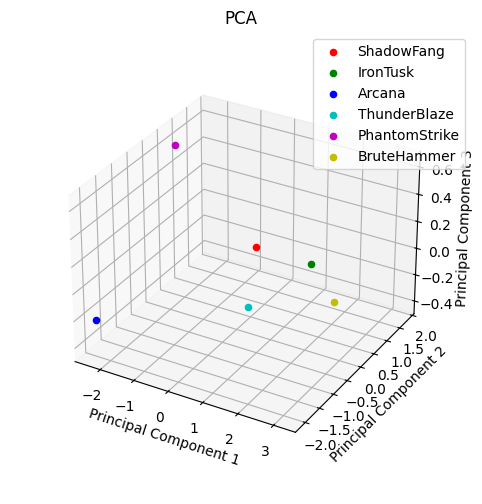

In [9]:
# Task 1 Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA')

colors = ['r', 'g', 'b', 'c', 'm', 'y']
for char, color in zip(df['Character'].unique(), colors):
    indicesToKeep = final_pca_Df['Character'] == char
    ax.scatter3D(final_pca_Df.loc[indicesToKeep, 'principal component 1'], final_pca_Df.loc[indicesToKeep, 'principal component 2'], final_pca_Df.loc[indicesToKeep, 'principal component 3'], c = color)

ax.legend(df['Character'].unique())
ax.grid()
ax.set_box_aspect(None, zoom=0.85)
plt.show()

In [10]:
# Task 2 t-SNE
x = df.drop('Character', axis=1)

x = StandardScaler().fit_transform(x)

model = TSNE(n_components=2, verbose=1, perplexity=5)
tsne_data = model.fit_transform(x)

tsne_df = pd.DataFrame(data=tsne_data, columns=['Dimension 1', 'Dimension 2'])
final_tsne_Df = pd.concat([tsne_df, df[['Character']]], axis = 1)
final_tsne_Df

[t-SNE] Computing 5 nearest neighbors...
[t-SNE] Indexed 6 samples in 0.001s...
[t-SNE] Computed neighbors for 6 samples in 0.101s...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 47.267133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.734055
[t-SNE] KL divergence after 1000 iterations: 0.131459


,Dimension 1,Dimension 2,Character
0,-10.769049,-15.163011,ShadowFang
1,1.296945,48.545216,IronTusk
2,53.607193,-6.947335,Arcana
3,16.835173,-73.713432,ThunderBlaze
4,-67.591187,16.007120,PhantomStrike
5,-58.069786,-59.616917,BruteHammer


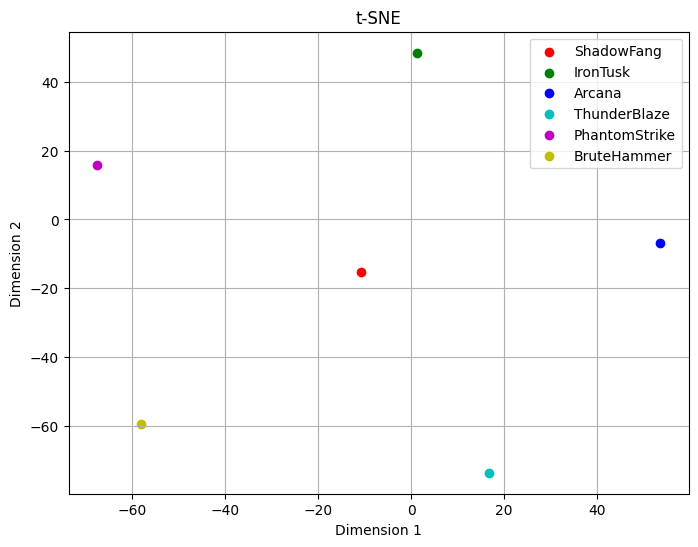

In [11]:
# Task 2 Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('t-SNE')

colors = ['r', 'g', 'b', 'c', 'm', 'y']
for char, color in zip(df['Character'].unique(), colors):
    indicesToKeep = final_tsne_Df['Character'] == char
    ax.scatter(final_tsne_Df.loc[indicesToKeep, 'Dimension 1'], final_tsne_Df.loc[indicesToKeep, 'Dimension 2'], c = color)

ax.legend(df['Character'].unique())
ax.grid()
plt.show()